# Financing

This notebook shows how to implement financing calculations.  I've defined the calculations as functions in the module finance.py.

To use the functions you just need to know what your principal, interest rate, and fees are and the length of your loan. 

In [1]:
# Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import financing as fin

# Introduction

Your monthly payment, also called your Equated Monthly Installment (EMI) is a fixed payment amount made by a borrower to a lender at a specified date each calendar month.  A monthly payment can be calculated using an [EMI formula](./loan_calculator_GUI.ipynb). 


# How a Monthly Payment (Equated Monthly Installment) is Calculated

## The cost of financing a new car

### Scenario

Say I buy want to buy a new car for **$31,115**. I am curious how much it will cost me each month if I decide on taking out a loan to buy this new vehicle. A car dealer offers me a fixed interest rate of **7.02%** on a **five-year** auto loan. How much would a monthly car payment be assuming the sales tax rate is **7.5%**?

### Calculating a Monthly Payment (Simplified)

In [2]:
# P = principal (loan amount)
# rate = annual interest rate (as % so if rate is 5 percent then rate = 5)
# years = # of years for the loan (e.g., ror 0-year loan, years = 30)

P = 31115 * (1.075)  
rate = 7.02
years = 5

In [3]:
fin.emi_calc(P, rate, years)

662.64

While the above is a simplified calculation, there is a more accurate calculation that considers fees.

### Scenario

Say I buy want to buy a car for **$31,115** from a car dealership which has a total sales tax rate of **9.75%**. 

The price was originally **$32,615** before the dealership reduced the price through a rebate. 

The state taxes the vehicle purchases before the rebate is applied to the price of a car. Other fees for this example are:
- Emissions testing fee: **$50**

- Registration Fee: **$200**

- Plate Transfer Fee: **$65**

- Documentation Fee: **$80**


A car dealer offers me a fixed interest rate of **7.02%** on a **five-year** auto loan. How much would a monthly car payment be?

### Calculating a Monthly Payment (with some fees included)

In [4]:
P = 31115 
sales_tax = (32615 * 0.0975)
emissions_fee = 50
reg_fee = 200
plate_fee = 65
addl_fee = 80
fees = [sales_tax, emissions_fee, reg_fee, plate_fee, addl_fee]
rate = 7.02
years = 5

In [5]:
fin.emi_with_fees(P, rate, years, fees)

687.23

# How much in interest you will pay over the course of your loan

This is a little complicated as the percent of a monthly payment that go towards paying off the principal of a loan increases over time. The graph we generate below shows that with every subsequent monthly payment, the principal paid keeps on rising while the interest paid keeps on lowering.

Using the same values for principal, rate, and years as above:

In [6]:
payment_table = fin.make_payment_table(P, rate, years, fees)

In [7]:
payment_table.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
0,1,34689.9625,687.23,202.93,484.30,34205.66
1,2,34205.6600,687.23,200.10,487.13,33718.53
2,3,33718.5300,687.23,197.25,489.98,33228.55
3,4,33228.5500,687.23,194.38,492.85,32735.70
4,5,32735.7000,687.23,191.50,495.73,32239.97


In [8]:
payment_table.tail()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
55,56,3376.37,687.23,19.75,667.48,2708.89
56,57,2708.89,687.23,15.84,671.39,2037.50
57,58,2037.50,687.23,11.91,675.32,1362.18
58,59,1362.18,687.23,7.96,679.27,682.91
59,60,682.91,687.23,3.99,683.24,-0.33


In [9]:
np.round(payment_table['Interest Paid'].sum(),2)

6543.51

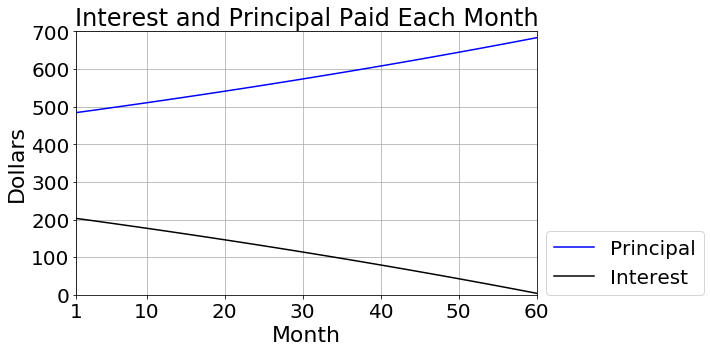

In [10]:
fin.nb_print_int_princpl(payment_table);

We can also look at how much you would save if you repaid additional money each month (beyond the required \$687.23).

In [11]:
add_pay = 300

payment_table = fin.make_payment_table(Po=P, air=rate, years=years, fees=fees, add_emi=add_pay)

In [12]:
payment_table.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
0,1,34689.9625,987.23,202.93,784.30,33905.66
1,2,33905.6600,987.23,198.34,788.89,33116.77
2,3,33116.7700,987.23,193.73,793.50,32323.27
3,4,32323.2700,987.23,189.09,798.14,31525.13
4,5,31525.1300,987.23,184.42,802.81,30722.32


In [13]:
payment_table.tail()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance
35,36,4325.37,987.23,25.30,961.93,3363.44
36,37,3363.44,987.23,19.67,967.56,2395.88
37,38,2395.88,987.23,14.01,973.22,1422.66
38,39,1422.66,987.23,8.32,978.91,443.75
39,40,443.75,987.23,2.59,984.64,-540.89


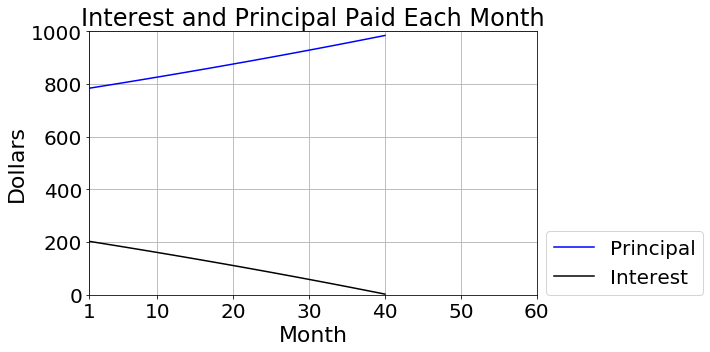

In [14]:
fin.nb_print_int_princpl(payment_table,1000);

In [15]:
np.round(payment_table['Interest Paid'].sum(),2)

4258.35

In [16]:
6543.51 - 4258.35

2285.16

In [17]:
np.round((60-40)/12,2)

1.67

You would save **\$2285.16** by repaying an extra \$300 each month and own the car ~1.7 years sooner (3.3 years vs. 5 years).

Making extra payments early in the loan saves you money over the life of the loan. The earlier you begin paying extra the more money you'll save.

You can compare calculations using an online [calculator](https://www.calcxml.com/calculators/extra-payment-calculator).

# How much will refinancing to a lower interest rate save you

This example looks at how much less a person could pay in interest (Total Interest Paid) over the course of a loan with a lower interest rate.

### Scenario

We refinance to a **3.59%** interest rate vs a **7.02%** interest rate.  Everything else stays the same.

In [18]:
rate = 3.59

In [19]:
fin.emi_with_fees(P, rate, years, fees)

632.47

In [20]:
payment_table = fin.make_payment_table(P, rate, years, fees)

In [21]:
np.round(payment_table['Interest Paid'].sum(),2)

3257.88

In [22]:
np.round(687.23 - 632.47,2)

54.76

In [23]:
6543.51 - 3257.88

3285.63

By using the same calculation method as the previous section, the lower interest rate would save **\$3285.63**
(`6543.51 — 3257.88`) in total interest paid. Also, the monthly payment would be **\$54.76** less (`687.23 — 632.47`) with the lower interest rate.